In [8]:
#project PDS-08-09:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the dataset
data = pd.read_csv('Mall_Customers.csv')

# Drop 'CustomerID' column
data = data.drop('CustomerID', axis=1)

In [9]:
# Encode 'Gender' column if present
if 'Gender' in data.columns:
    le = LabelEncoder()
    data['Gender'] = le.fit_transform(data['Gender'])

# Extract features and scale them
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

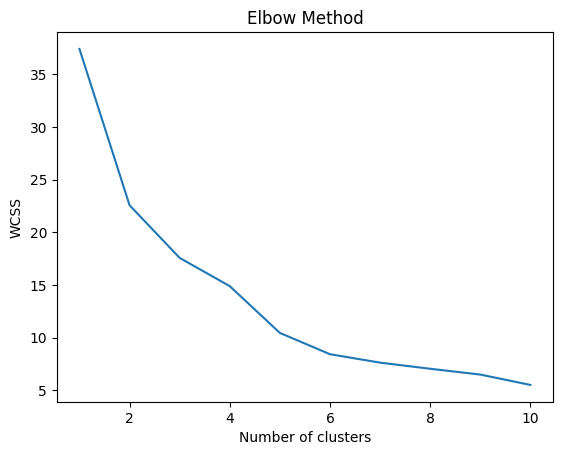

In [11]:
# Plotting the Elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# From the elbow graph, choose the optimal K
optimal_k = 5  # Suppose 5 was the elbow point

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)


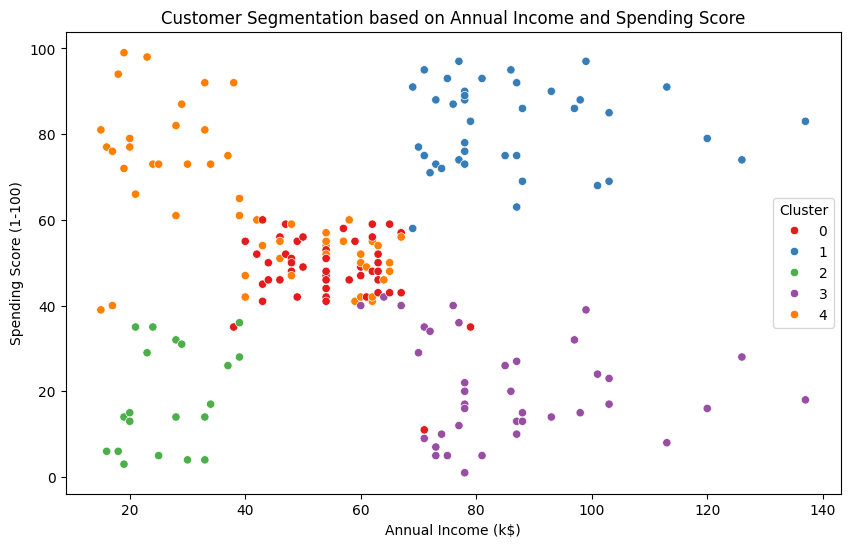

Silhouette Score: 0.40421034059490324


In [13]:
# Add the cluster labels to the original data
data['Cluster'] = y_kmeans

# Visualization of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='Set1')
plt.title('Customer Segmentation based on Annual Income and Spending Score')
plt.show()

# Evaluation using silhouette score
silhouette_avg = silhouette_score(X_scaled, y_kmeans)
print(f'Silhouette Score: {silhouette_avg}')